<a href="https://colab.research.google.com/github/yasminbv/DataScience/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv

z=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [5]:
#Q2-Get first 2 rows of data

z.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [4]:
#Q3-Check if there is missing value

z.isna().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [5]:
#Q4- Get data information and number of rows and columns

z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [6]:
#Q5-Get descriptive statistics of data

z.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


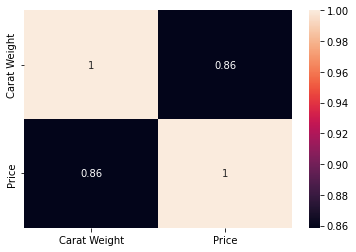

In [7]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square

k=sns.heatmap(z.corr(),annot=True)

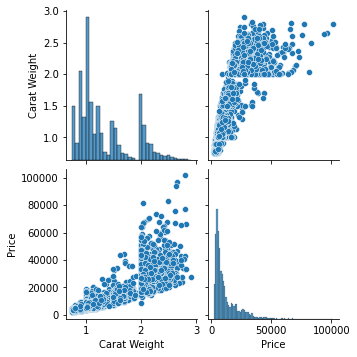

In [8]:
#Q7-Use seasoborns paiplot to generate following  diagram

sns.pairplot(z)

In [3]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)

y=z['Price']
X=z.drop(['Price'], axis=1)

In [4]:
#Q9-Create dummy for the input variables (X)

X=pd.get_dummies(X, drop_first=True)

In [5]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4800, 23)
(4800,)
(1200, 23)
(1200,)


In [6]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [7]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric

z_lm=LinearRegression()
z_lm.fit(X_train, y_train)

predT=z_lm.predict(X_train)
evalmetric(y_train, predT)
print()
predT=z_lm.predict(X_test)
evalmetric(y_test, predT)

MSE: 13839948.248906838
RMSE: 3720.2080921511415
MAE: 2416.6382939623713
MAPE: 28.379398782212938
R-Squared: 0.8664692805874095

MSE: 15440271.7800947
RMSE: 3929.4111238320047
MAE: 2461.6659183886954
MAPE: 29.17949258728163
R-Squared: 0.851216768376696


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?

**QUESTION12 ->ANSWER:**
*Overfitting means that model doesn't generalize the data, but it learns its specific relationship between X and Y variables in training data. Thus, we can say that there is overfitting in performance of the liner model.*

In [8]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric

from sklearn.linear_model import Lasso
lasso2=Lasso()
lasso2.fit(X_train, y_train)

predL=lasso2.predict(X_train)
evalmetric(y_train, predL)
print()
predL=lasso2.predict(X_test)
evalmetric(y_test, predL)

MSE: 13925780.708163053
RMSE: 3731.7262370333456
MAE: 2422.264603510413
MAPE: 28.45897442940501
R-Squared: 0.8656411510433316

MSE: 15431904.362062912
RMSE: 3928.3462630046897
MAE: 2467.281017412697
MAPE: 29.26822115942428
R-Squared: 0.8512973972356204


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+10, tolerance: 4.975e+07
  model = cd_fast.enet_coordinate_descent(


In [11]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
from sklearn.linear_model import Ridge
ridge2=Ridge()
ridge2.fit(X_train, y_train)
print('Train data')
predR=ridge2.predict(X_train)
evalmetric(y_train, predR)
print('Test data')
predR=ridge2.predict(X_test)
evalmetric(y_test, predR)

Train data
MSE: 14162075.174777133
RMSE: 3763.2532700812385
MAE: 2431.896068548525
MAPE: 28.600458776593847
R-Squared: 0.8633613325387581
Test data
MSE: 15429227.245038258
RMSE: 3928.0055047107885
MAE: 2475.551798681158
MAPE: 29.42658637657207
R-Squared: 0.8513231940692535


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why? 

**QUESTION15 ->ANSWER:**
*Yes, because Ridge and Lasso models are working in a way to decrease model complexity for better accuracy, by penalizing non-zero coefficients and keeping all variables in the model.*

In [12]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)
dt_pred_train=dt.predict(X_train)
dt_pred_test=dt.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, dt_pred_train))
print(accuracy_score(y_test, dt_pred_test))

0.85875
0.02


In [ ]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)
rfc_pred_train=rfc.predict(X_train)
rfc_pred_test=rfc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, dt_pred_train))
print(accuracy_score(y_test, dt_pred_test))

Q18-Why Random forest perform better than Decison Tree on test data?

**QUESTION18 ->ANSWER:**
*Random Forest reduces overfitting problem by combining output of all the trees, thus, reduces variance and improves accuracy.*

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?


**QUESTION19 ->ANSWER:**
*Out of all techniques, Lasso Regression and Decision Tree showed one of the best performances on test data.*